# 삼성전자 차트 불러오기

In [108]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [3]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
#전체 페이지 구하기
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    print(pgrr.a['href'])
#005930 종목 코드 & 613 맨뒤

/item/sise_day.nhn?code=005930&page=613


In [5]:
#text 확인(계층적으로)
print(pgrr.prettify())

<td class="pgRR">
 <a href="/item/sise_day.nhn?code=005930&amp;page=613">
  맨뒤
  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
 </a>
</td>



In [7]:
print(pgrr.text)


맨뒤
				




In [10]:
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]
    print(last_page)

613


In [109]:
import pandas as pd

In [14]:
#전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'

for page in range(1,int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url,page) # url 페이지 수 변경
    df = df.append(pd.read_html(page_url,header=0)[0]) #한 페이지 분량의 데이터 프레임을 df에 추가

df = df.dropna() #값이 빠진 행 제거
print(df)

            날짜       종가     전일비       시가       고가       저가         거래량
1   2020.11.09  60600.0   500.0  60700.0  60900.0  60300.0  11615814.0
2   2020.11.06  60100.0   200.0  60700.0  60800.0  59600.0  16910230.0
3   2020.11.05  60300.0  1800.0  59000.0  60300.0  58800.0  20639475.0
4   2020.11.04  58500.0   300.0  58900.0  59000.0  57800.0  21718561.0
5   2020.11.03  58800.0  1400.0  57900.0  58900.0  57600.0  14950919.0
..         ...      ...     ...      ...      ...      ...         ...
2   1996.06.29  68500.0   400.0  68100.0  69100.0  67100.0     96710.0
3   1996.06.28  68100.0  1200.0  67300.0  68500.0  67200.0    138430.0
4   1996.06.27  66900.0   800.0  67500.0  67700.0  66700.0    155450.0
5   1996.06.26  67700.0   200.0  67600.0  67900.0  66000.0    136630.0
9   1996.06.25  67500.0     0.0  66500.0  68300.0  65600.0    112960.0

[6126 rows x 7 columns]


## 삼성전자 종가 차트

In [110]:
from urllib.request import urlopen
from matplotlib import pyplot as plt

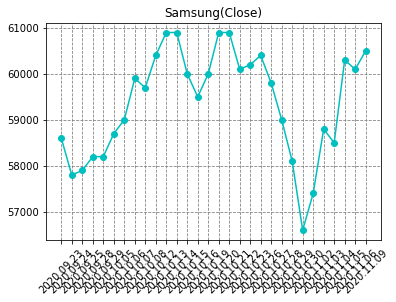

In [18]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
#맨 뒤 페이지 숫자 구하기
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]
    
#전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'
for page in range(1,int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url,page) # url 페이지 수 변경
    df = df.append(pd.read_html(page_url,header=0)[0]) #한 페이지 분량의 데이터 프레임을 df에 추가

#차트 출력을 위해 데이터프레임 가공
df = df.dropna()
df = df.iloc[0:30] #최근 30일로만 
df = df.sort_values(by='날짜')#날짜 오름차순으로 정렬

#날짜, 종가 컬럼으로 차트 그리기
plt.title('Samsung(Close)')
plt.xticks(rotation=45)#45도 회전
plt.plot(df['날짜'],df['종가'],'co-')#co : 청록색 원
plt.grid(color='gray',linestyle='--')
plt.show()

## 삼성전자 캔들 차트

In [19]:
pip install --upgrade mplfinance

Note: you may need to restart the kernel to use updated packages.


In [111]:
import mplfinance as mpf

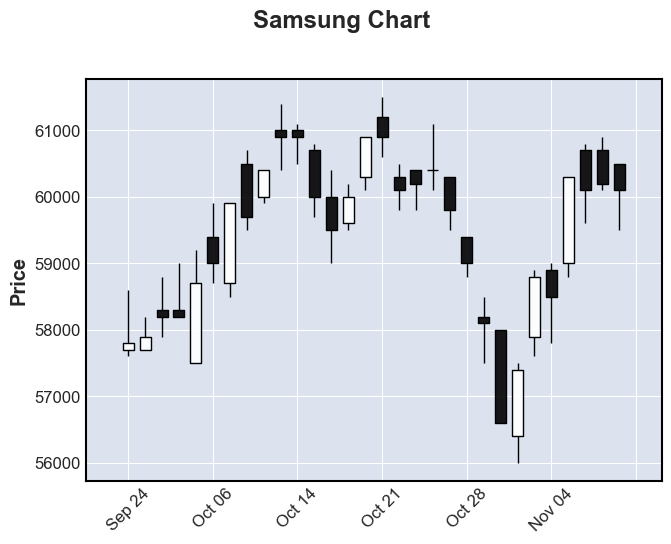

In [129]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
#맨 뒤 페이지 숫자 구하기
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]
    
#전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'
for page in range(1,int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url,page) # url 페이지 수 변경
    df = df.append(pd.read_html(page_url,header=0)[0]) #한 페이지 분량의 데이터 프레임을 df에 추가

#차트 출력을 위해 데이터프레임 가공
df = df.dropna()
df = df.iloc[0:30] #최근 30일로만 
df = df.rename(columns={'날짜':'Date','시가':'Open','고가':'High','저가':'Low','종가':'Close','거래량':'Volume'})
df = df.sort_values(by='Date')
df.index = pd.to_datetime(df.Date)#Date 컬럼을 DatetimeIndex형으로 변경 후 인덱스로 설정
df = df[['Open','High','Low','Close','Volume']]

#날짜, 종가 컬럼으로 차트 그리기
mpf.plot(df,title = 'Samsung Chart',type='candle')

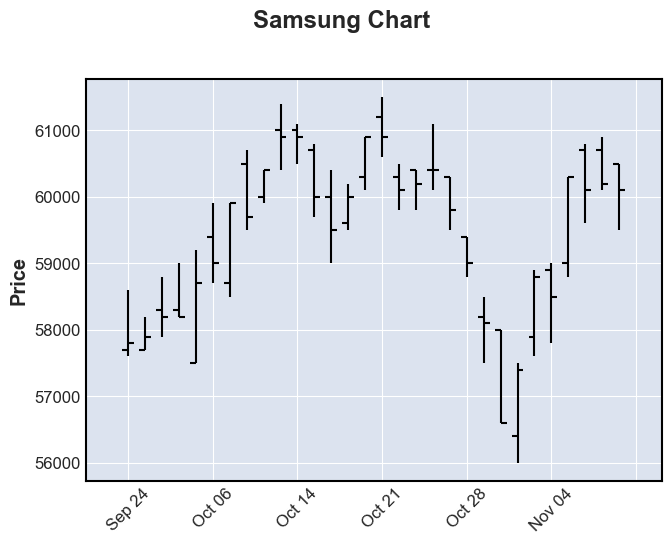

In [130]:
mpf.plot(df,title = 'Samsung Chart',type='ohlc')

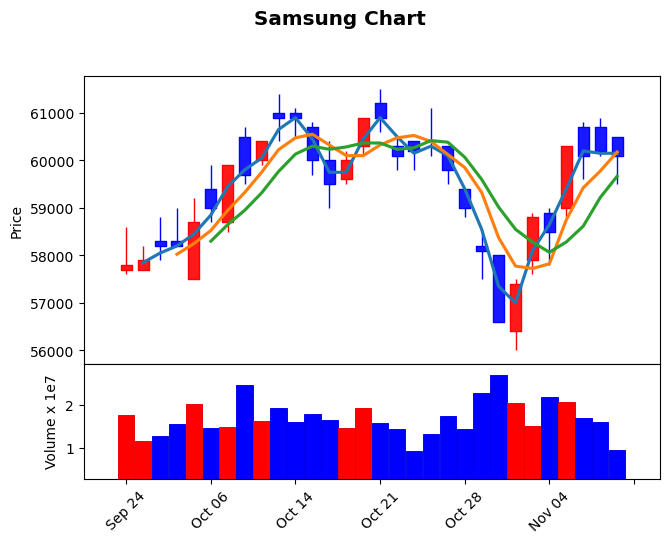

In [139]:
kwargs = dict(title='Samsung Chart', type = 'candle',
             mav=(2,4,6), volume =True, ylabel ='Price')
mc = mpf.make_marketcolors(up='r',down='b',inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df,**kwargs,style=s)

## 그래프 저장하기

In [143]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [144]:
import io
print('pandas      version:',pd.__version__)
print('mplfinance  version:',mpf.__version__)

pandas      version: 1.1.1
mplfinance  version: 0.12.7a0


In [146]:
mpf.plot(df,**kwargs,style=s,savefig='Samsung.png')

In [147]:
import IPython.display as IPydisplay

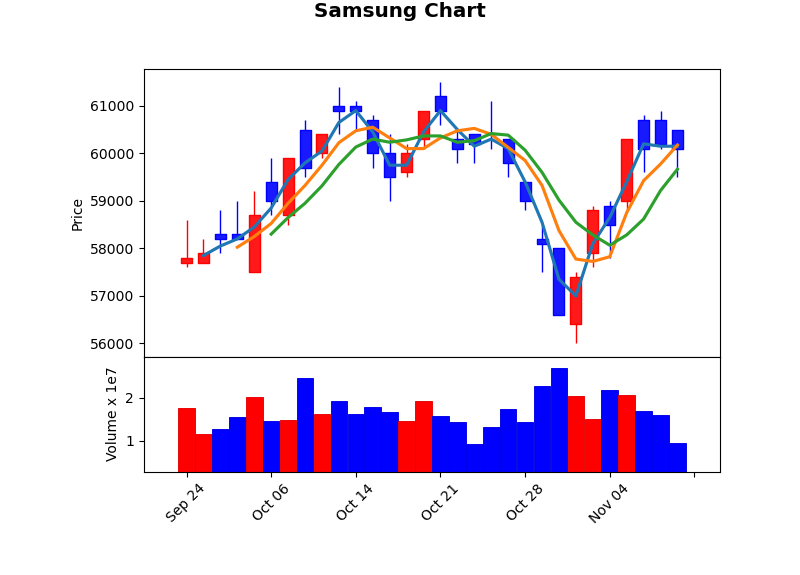

In [148]:
IPydisplay.Image(filename='Samsung.png')

In [19]:
#pip install plotly

ERROR: Could not install packages due to an EnvironmentError: [WinError 32] 다른 프로세스가 파일을 사용 중이기 때문에 프로세스가 액세스 할 수 없습니다: 'C:\\Users\\09\\anaconda-3\\Lib\\site-packages\\plotly\\validators\\table\\header\\font\\_size.py'
Consider using the `--user` option or check the permissions.



Processing c:\users\09\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf\retrying-1.3.3-py3-none-any.whl
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=455fe85ae6a75c0d9de4a01ccfc12286c8bfb5a6b2b6cf3b7e254f1d980aeca9
  Stored in directory: c:\users\09\appdata\local\pip\cache\wheels\f9\8d\8d\f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [115]:
#반응형 차트 그리기
import plotly
import plotly.graph_objects as go
import plotly.express as px

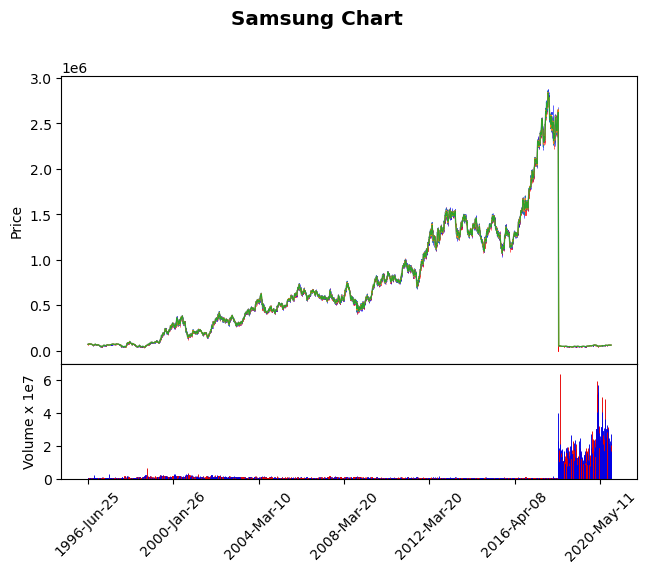

AttributeError: 'NoneType' object has no attribute 'update_xaxes'

In [116]:
fig = mpf.plot(df,**kwargs,style=s)
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [117]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
#맨 뒤 페이지 숫자 구하기
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td', class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    last_page = s[-1]
    
#전체 페이지 읽어오기
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'
for page in range(1,int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url,page) # url 페이지 수 변경
    df = df.append(pd.read_html(page_url,header=0)[0]) #한 페이지 분량의 데이터 프레임을 df에 추가

#차트 출력을 위해 데이터프레임 가공
df = df.dropna()
#df = df.iloc[0:30] #최근 30일로만 
df = df.rename(columns={'날짜':'Date','시가':'Open','고가':'High','저가':'Low','종가':'Close','거래량':'Volume'})
df = df.sort_values(by='Date')
df = df[['Date','Open','High','Low','Close','Volume']]

In [118]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [46]:
#!pip install bokeh

In [122]:
from math import pi

import pandas as pd

from bokeh.plotting import figure, output_file, show


df["Date"] = pd.to_datetime(df["Date"])

inc = df.Close > df.Open
dec = df.Open > df.Close
w = 12*60*60*1000 # half day in ms

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p = figure(x_axis_type="datetime", tools=TOOLS, plot_width=1000, title = "MSFT Candlestick")
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3

p.segment(df.Date, df.High, df.Date, df.Low, color="black")
p.vbar(df.index[inc], w, df.Open[inc], df.Close[inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.index[dec], w, df.Open[dec], df.Close[dec], fill_color="#F2583E", line_color="black")

output_file("candlestick.html", title="candlestick.py example")

show(p)  # open a browser

In [120]:
from bokeh.io import show, output_file
from bokeh.plotting import figure
from bokeh.layouts import gridplot
from bokeh.models.formatters import NumeralTickFormatter
from bokeh.embed import components

inc = df.Close >= df.Open
dec = df.Open > df.Close

p_candlechart = figure(x_axis_type = 'datetime',  plot_width=1050, plot_height=200, tools = "lasso_select, crosshair, hover, xwheel_pan, reset", active_drag='lasso_select')
p_candlechart.segment(df.index[inc], df.High[inc], df.index[inc], df.Low[inc], color="red")
p_candlechart.segment(df.index[dec], df.High[dec], df.index[dec], df.Low[dec], color="blue")
p_candlechart.vbar(df.index[inc], 0.5, df.Open[inc], df.Close[inc], fill_color="red", line_color="red")
p_candlechart.vbar(df.index[dec], 0.5, df.Open[dec], df.Close[dec], fill_color="blue", line_color="blue")
p_candlechart.yaxis[0].formatter = NumeralTickFormatter(format='0,0')
p_candlechart.xaxis.visible = False

p_volumechart = figure(plot_width=1050, plot_height=100, x_range=p_candlechart.x_range, tools="crosshair")
p_volumechart.vbar(df.index, 0.5, df.Volume, fill_color="black", line_color="black")
major_label = {
    i: date.strftime('%Y%m%d') for i, date in enumerate(pd.to_datetime(df.index))
}
major_label.update({len(df): ''})
p_volumechart.xaxis.major_label_overrides = major_label
p_volumechart.yaxis[0].formatter = NumeralTickFormatter(format='0,0')

p = gridplot([[p_candlechart], [p_volumechart]], toolbar_location='left')


script, div = components(p)

In [121]:
div

'\n<div class="bk-root" id="e729e12f-59fa-4f1d-bea5-321b7677a802" data-root-id="11138"></div>'